<a href="https://colab.research.google.com/github/qedir051/ML-Projects/blob/main/IntroductionToArtificialNeurolNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', "petal width (cm)"]].values
y = (iris.target == 0)

In [ ]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [ ]:
X_new = [[2, 0.5], [3, 1]]
y_pred =per_clf.predict(X_new)

In [ ]:
y_pred

array([ True, False])

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    housing.data, housing.target, random_state=42
)

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5245109352606162

In [ ]:
# extra code – this was left as an exercise for the reader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

# Implementing MLPs with Keras

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

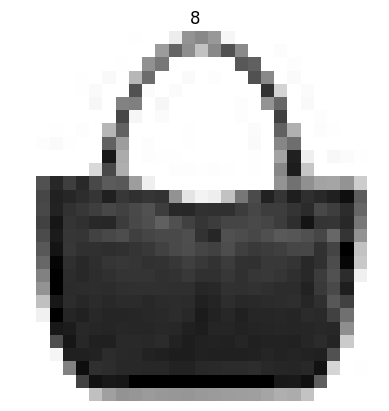

In [ ]:
plt.imshow(X_train[100], cmap="binary")
plt.title(y_train[100])
plt.axis('off')
plt.show()

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

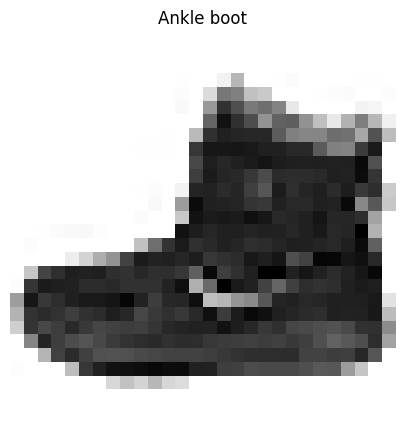

In [ ]:
plt.figure(figsize=(7, 5))
plt.imshow(X_train[0], cmap="binary")
plt.title(class_names[y_train[0]])
plt.axis('off')
plt.show()

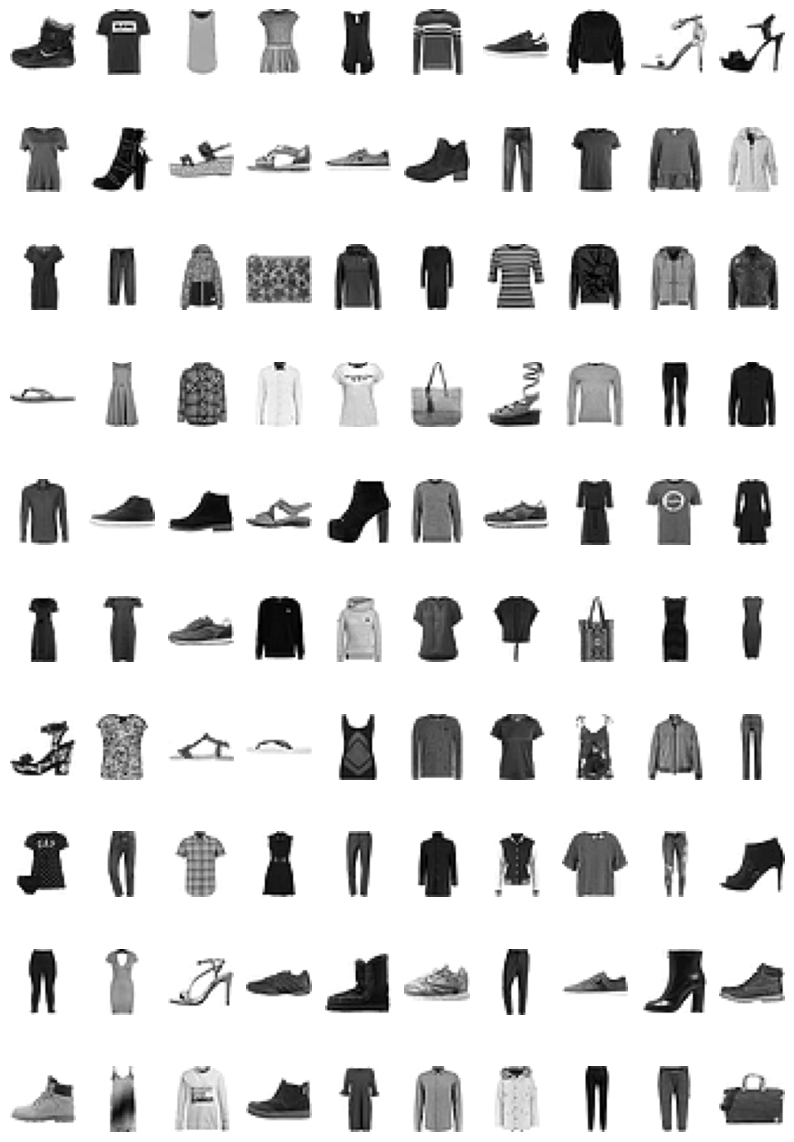

In [ ]:
plt.figure(figsize=(10, 15))

for i in range(100):
  plt.subplot(10, 10, i + 1)
  plt.imshow(X_train[i], cmap="binary")
  #plt.title(class_names[y_train[i]])
  plt.axis('off')

In [ ]:
len(np.unique(y_train))

10

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

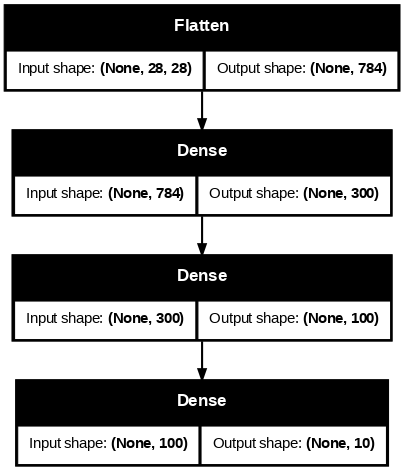

In [ ]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True,dpi=75)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01242911,  0.02621202,  0.02940081, ..., -0.07277648,
        -0.05417974,  0.04486735],
       [-0.01253827, -0.04351849,  0.03050274, ...,  0.0484656 ,
         0.01114065, -0.02239909],
       [-0.05419356, -0.01982395, -0.03215325, ...,  0.0509886 ,
        -0.02715935, -0.0291403 ],
       ...,
       [ 0.04248112,  0.01994423, -0.04954188, ...,  0.0228063 ,
         0.002551  ,  0.00053725],
       [ 0.06722565,  0.04022422, -0.01703781, ..., -0.06289484,
         0.03011391, -0.03343968],
       [ 0.04225584, -0.02014013,  0.00333823, ...,  0.00600387,
         0.02779681,  0.00415871]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

# Compiling the Model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [ ]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = [tf.keras.metrics.sparse_categorical_accuracy])


In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6736 - loss: 1.0031 - val_accuracy: 0.8294 - val_loss: 0.5084
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8247 - loss: 0.5080 - val_accuracy: 0.8406 - val_loss: 0.4527
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8428 - loss: 0.4543 - val_accuracy: 0.8490 - val_loss: 0.4291
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8522 - loss: 0.4248 - val_accuracy: 0.8510 - val_loss: 0.4160
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8595 - loss: 0.4033 - val_accuracy: 0.8544 - val_loss: 0.4046
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8653 - loss: 0.3859 - val_accuracy: 0.8574 - val_loss: 0.3960
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8701 - loss: 0.3712 - val_accuracy: 0.8580 - val_loss: 0.3896
Epoch 8/30
 956/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8727 - loss: 0.3607

KeyboardInterrupt: 